In [1]:
%pylab notebook

import bmaster as m
import healpy as h

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


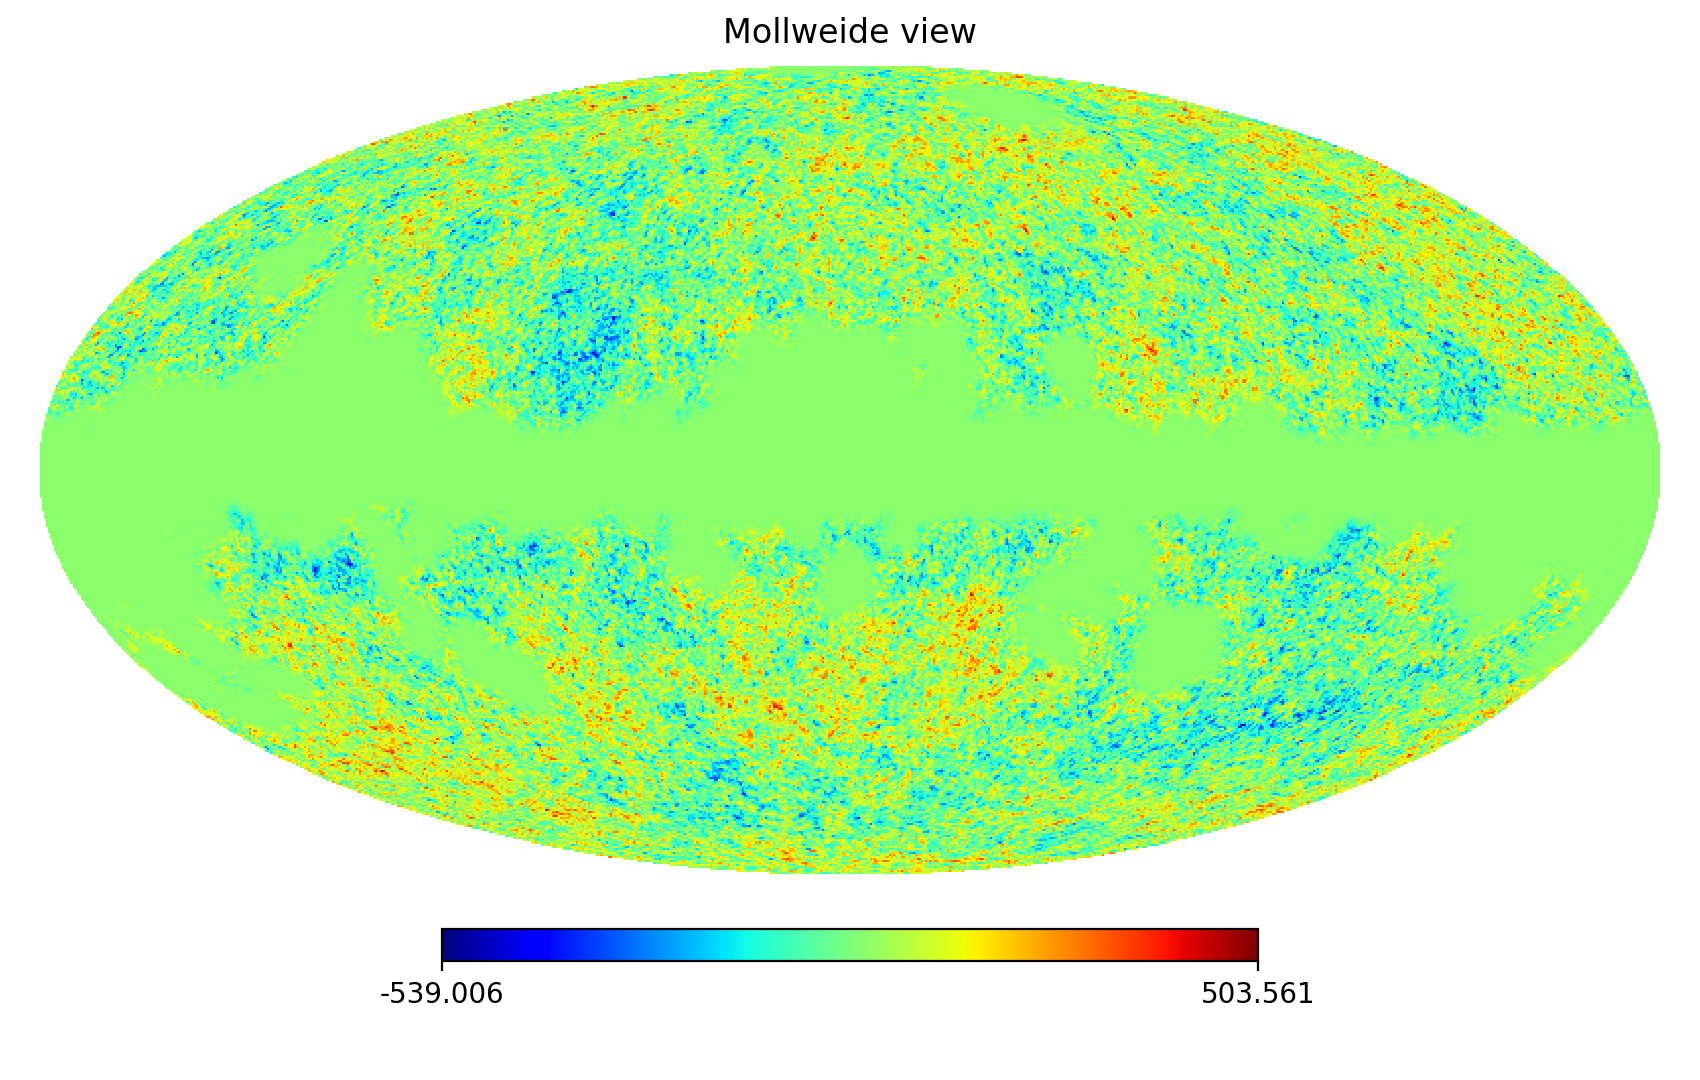

In [2]:
cl=h.read_cl("planck_wp_highL_lensing_param.fits")[0]
mask=h.read_map("../master-power-spectrum-estimation_v0/data/in/mask1.fits",verbose=False) ; fsky=sum(mask/size(mask))
cmb=h.synfast(cl,256,verbose=False)
h.mollview(cmb*mask)

# Unbinned master

<IPython.core.display.Javascript object>


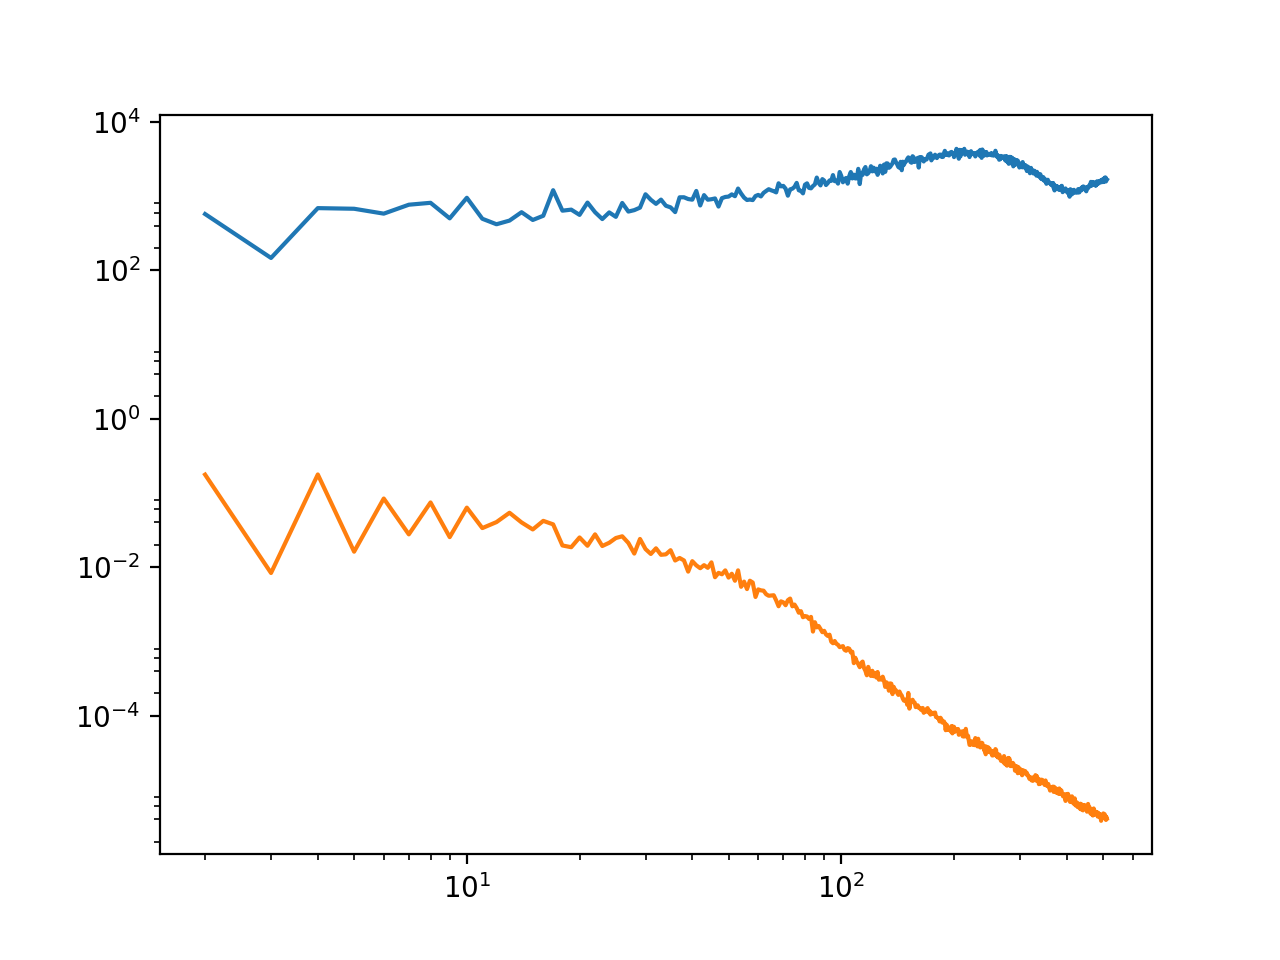

<IPython.core.display.Javascript object>


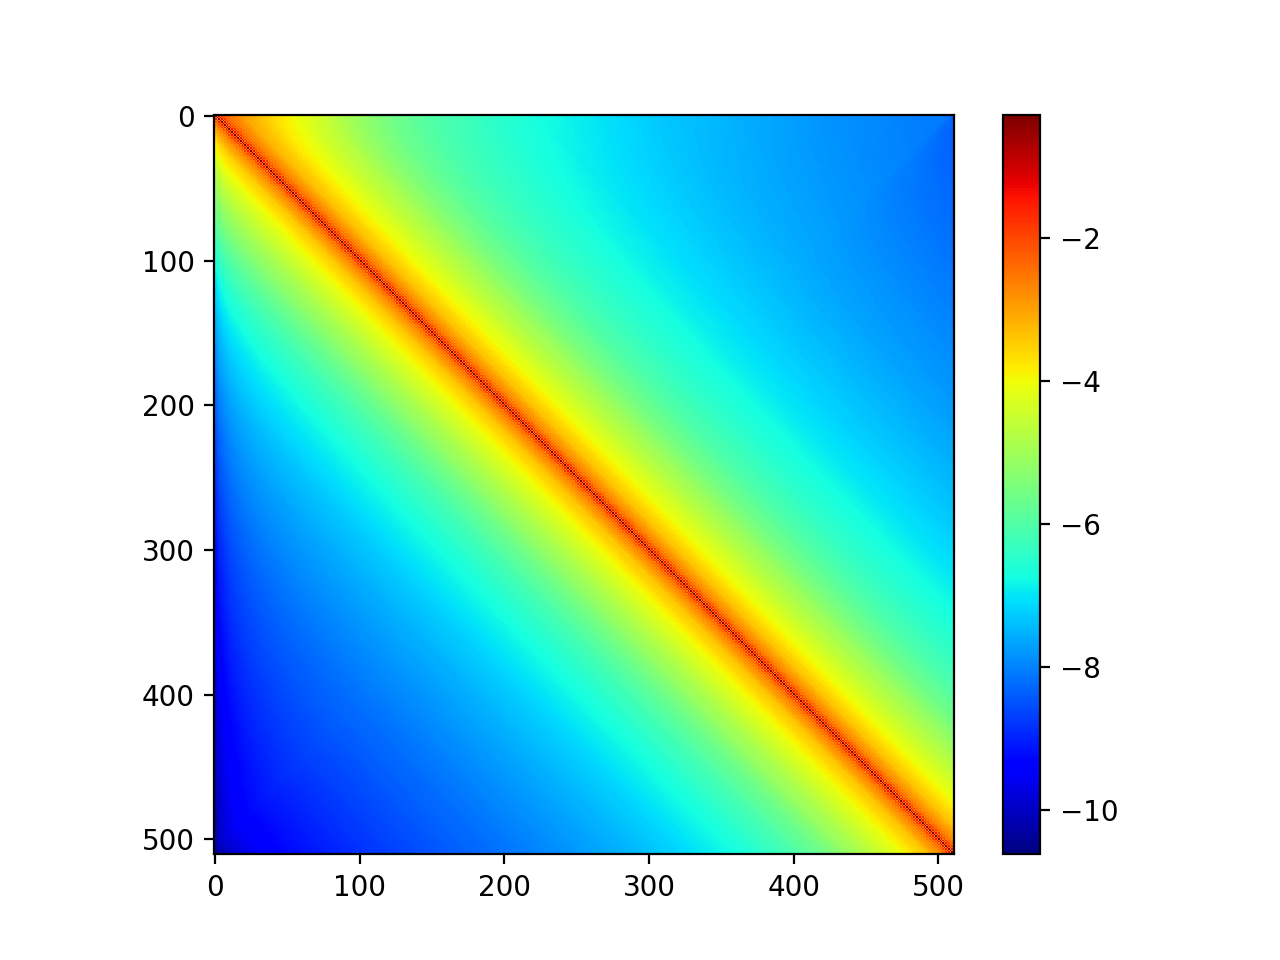

In [11]:
lmin=2; lmax=512 ; masklmax=512 ; ell=linspace(lmin,lmax,lmax-lmin+1) ; f=ell*(ell+1)/(2.*pi)

wl=h.alm2cl(h.map2alm(mask,lmax=masklmax))
clm=h.alm2cl(h.map2alm(cmb*mask,lmax=lmax))[lmin:lmax+1]

figure()
plot(ell,f*clm)
plot(ell,f*wl[2:])
loglog()

# Evaluate the mask coupling matrix
mllp=m.master.calc_kernel(wl,2,lmax,masklmax)

figure()
imshow(log10(mllp))
colorbar()

<IPython.core.display.Javascript object>


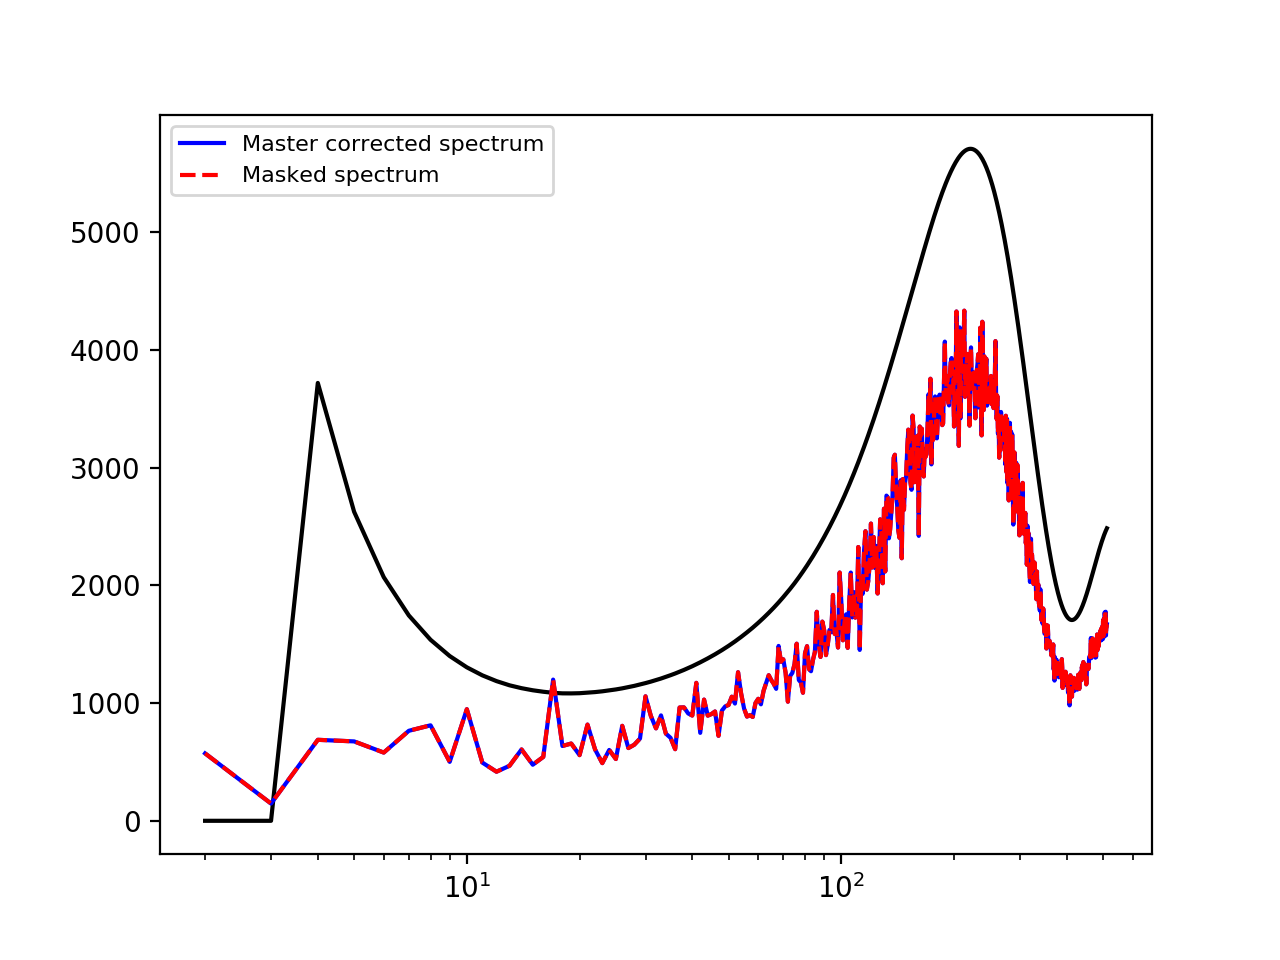

[]

In [16]:
cltemp=zeros(clm.size,float) ; cltemp[:]=clm[:]
m.master.est_true_cl(cltemp,mllp,lmax-lmin+1)

figure()
plot(ell,f*cl[:lmax-1],"k-",label="")
plot(ell,f*cltemp,"b-",label="Master corrected spectrum")
plot(ell,f*clm,"r--",label="Masked spectrum")
#plot(f*clm/fsky,"g-",label="Masked spectrum - fsky corrected")
legend(loc=0,fontsize=8)
semilogx()

# Binned master

In [6]:
deltal=32 ; totl=lmax-lmin+1
nbin=int(ceil(totl*1./deltal)) ; print nbin
pbl=zeros((nbin,lmax-lmin+1),float) ; qlb=zeros((lmax-lmin+1,nbin),float)
lbin=[]
for i in range(nbin):
    bmin=i*deltal
    bmax=min(bmin+deltal-1,lmax-lmin)
    ll=linspace(bmin+lmin,bmax+lmin,bmax-bmin+1)
    lbin=append(lbin,int(mean(ll)))
    print bmin,bmax,ll
    norm=len(ll)
    f1=ll*(ll+1)/(2.*pi*norm)
    g1=2.*pi/(ll*(ll+1)) 
    pbl[i,bmin:bmax+1]=f1
    qlb[bmin:bmax+1,i]=g1
    
flbin=lbin*(lbin+1)/(2.*pi)
#print bmin,bmax,norm

16
0 31 [  2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.
  32.  33.]
32 63 [ 34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.
  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.
  64.  65.]
64 95 [ 66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.
  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.
  96.  97.]
96 127 [  98.   99.  100.  101.  102.  103.  104.  105.  106.  107.  108.  109.
  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.  120.  121.
  122.  123.  124.  125.  126.  127.  128.  129.]
128 159 [ 130.  131.  132.  133.  134.  135.  136.  137.  138.  139.  140.  141.
  142.  143.  144.  145.  146.  147.  148.  149.  150.  151.  152.  153.
  154.  155.  156.  157.  158.  159.  160.  161.]
160 191 [ 162.  163.  164.  165.  166.  167.  168.  169.  170.  171.  172.  173.


<IPython.core.display.Javascript object>


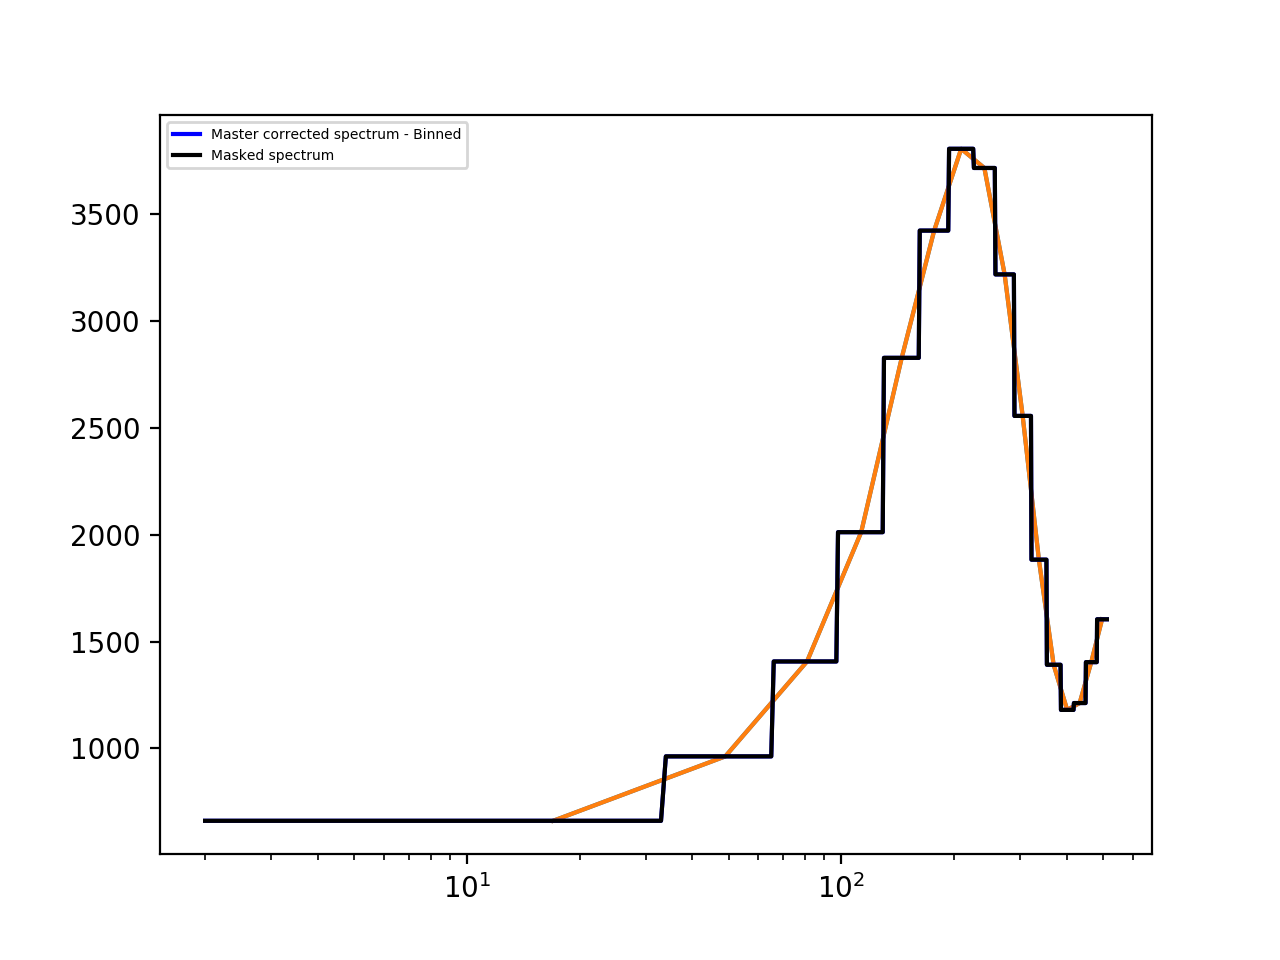

[]

In [8]:
mbbp=array(matrix(pbl)*matrix(mllp)*matrix(qlb))
bcl=array(matrix(pbl)*transpose(matrix(clm)))[:,0]
bcltemp=zeros(len(bcl),float) ; bcltemp[:]=bcl[:]
m.master.est_true_cl(bcltemp,mbbp,len(bcl))

bcls=array(matrix(qlb)*transpose(matrix(bcl)))[:,0]
bcltemps=array(matrix(qlb)*transpose(matrix(bcltemp)))[:,0]

figure()
plot(lbin,bcltemp)
plot(lbin,bcl)
plot(ell,f*bcltemps,"b-",label="Master corrected spectrum - Binned")
plot(ell,f*bcls,"k-",label="Masked spectrum")
legend(loc=0,fontsize=5)
semilogx()

<IPython.core.display.Javascript object>


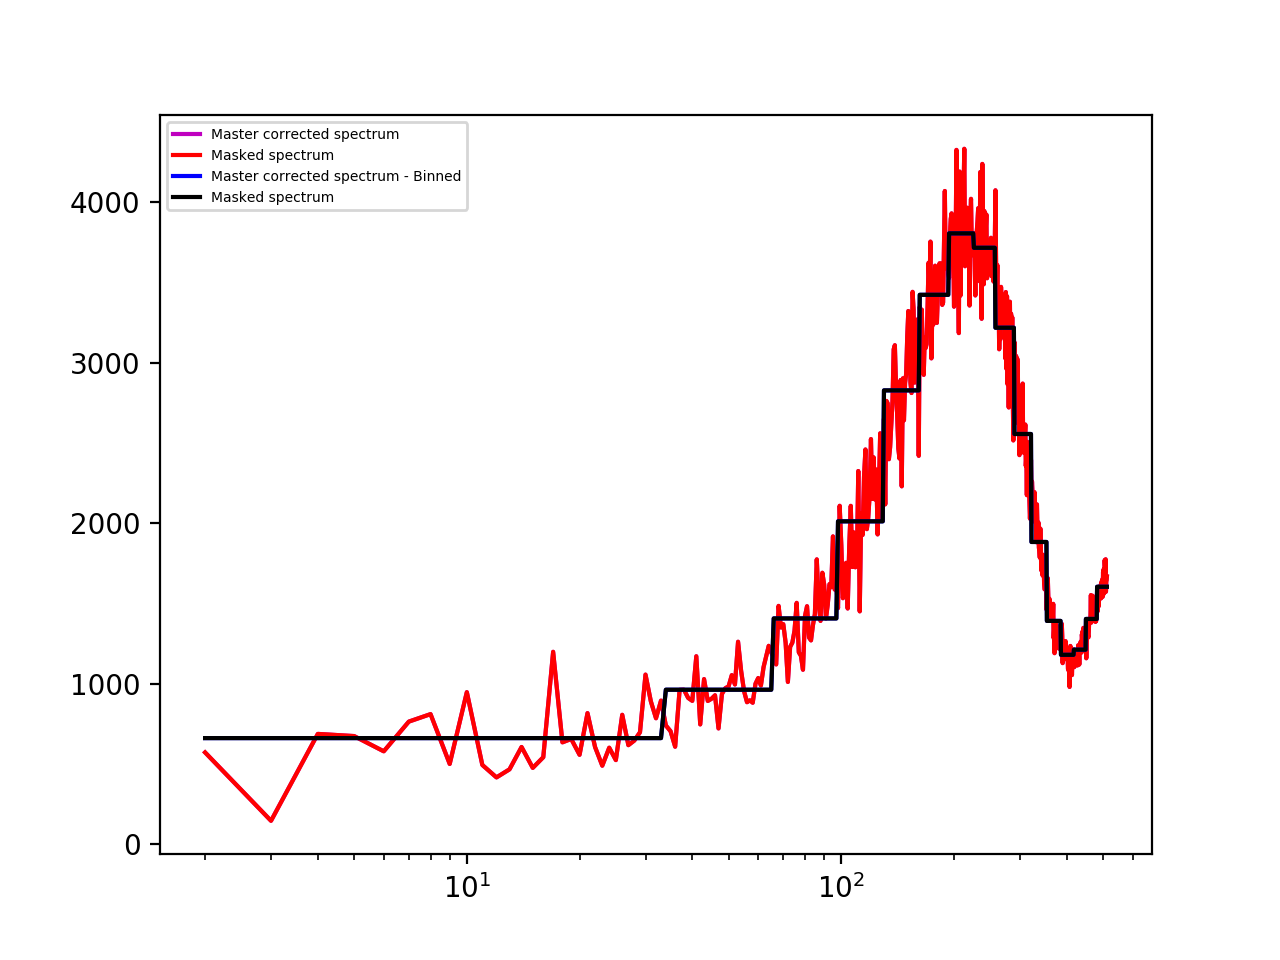

[]

In [9]:
figure()
plot(ell,f*cltemp,"m-",label="Master corrected spectrum")
plot(ell,f*clm,"r-",label="Masked spectrum")
plot(ell,f*bcltemps,"b-",label="Master corrected spectrum - Binned")
plot(ell,f*bcls,"k-",label="Masked spectrum")
legend(loc=0,fontsize=5)
#xlim(0,60)
semilogx()

<IPython.core.display.Javascript object>


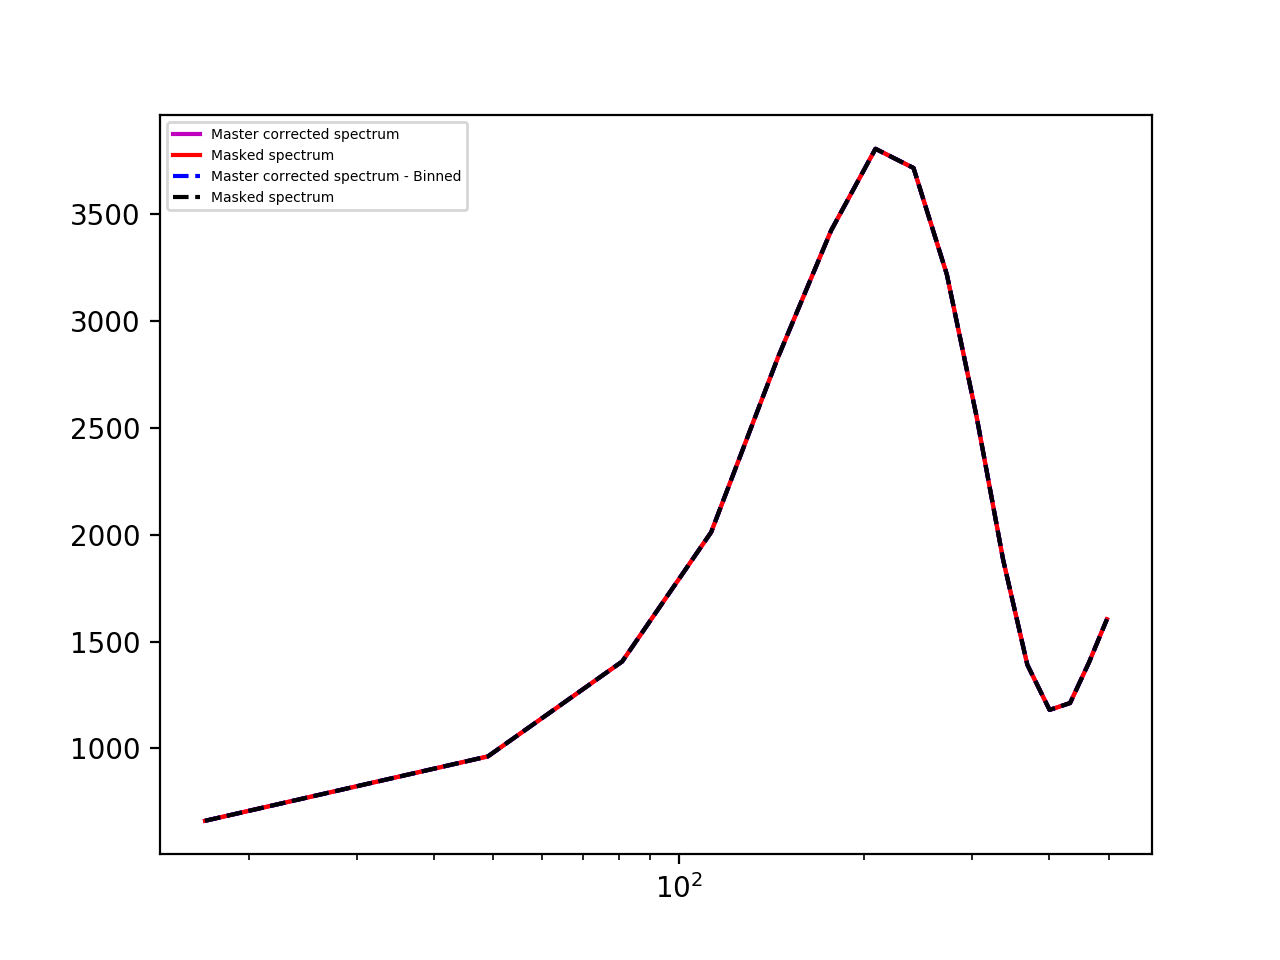

[]

In [10]:
figure()
plot(lbin,array(matrix(pbl)*transpose(matrix(cltemp)))[:,0],"m-",label="Master corrected spectrum")
plot(lbin,array(matrix(pbl)*transpose(matrix(clm)))[:,0],"r-",label="Masked spectrum")
plot(lbin,bcltemp,"b--",label="Master corrected spectrum - Binned")
plot(lbin,bcl,"k--",label="Masked spectrum")
legend(loc=0,fontsize=5)
#xlim(0,60)
semilogx()